# MLP testing notebook
I trained the smaller models on a smaller amount of data to find optimum hyperparameters. Once the best settings were found I used this on bigger models trained with more data using a GPU. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import MLPfunctions as mlp
import importlib
from importlib import reload
from sklearn.model_selection import train_test_split

# Create a dataframe from the csv file
dataset = pd.read_csv('HIGGS_train.csv')
# Make the dataset much smaller
dataset_small = dataset.sample(frac=0.1)
# Set aside a validation set
data_val = dataset_small.sample(frac=0.2)
dataset_small.drop(data_val.index, inplace=True)
X_val = data_val.iloc[:, 1:].values
y_val = data_val.iloc[:, 0].values
# Split the data into features and labels
X = dataset_small.iloc[:, 1:].values
y = dataset_small.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Print all the sizes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train,)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)


(563200, 28)
(140800, 28)
(176000, 28)


Epoch 1/1000, Train Loss: 0.6920670866966248, Test Loss: 0.738484799861908
Epoch 2/1000, Train Loss: 0.7375934720039368, Test Loss: 0.784781813621521
Epoch 3/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 4/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 5/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 6/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 7/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 8/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 9/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 10/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 11/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 12/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 13/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 14/1000, Train Loss: 0.783

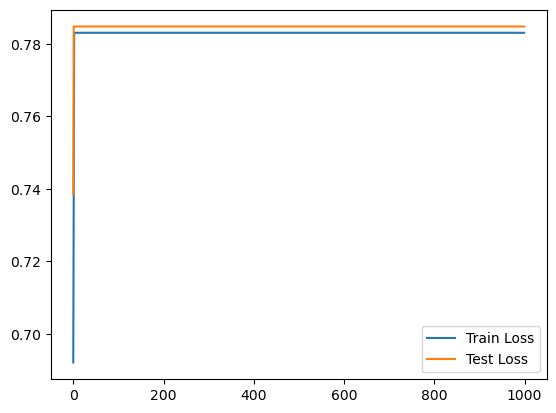

F1:0.6920624540178205
Accuracy:0.529125
Confusion Matrix:
[[    0 82874]
 [    0 93126]]


In [4]:
# Create the model
hidden_size = 50
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .1
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)


In [11]:
# Create the model
hidden_size = 30
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .005
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/1000, Train Loss: 0.6965864896774292, Test Loss: 0.6964472532272339
Epoch 2/1000, Train Loss: 0.6965609192848206, Test Loss: 0.6964225172996521
Epoch 3/1000, Train Loss: 0.6965355277061462, Test Loss: 0.6963980197906494
Epoch 4/1000, Train Loss: 0.6965101957321167, Test Loss: 0.6963735818862915
Epoch 5/1000, Train Loss: 0.6964849829673767, Test Loss: 0.6963492035865784
Epoch 6/1000, Train Loss: 0.6964598298072815, Test Loss: 0.6963250041007996
Epoch 7/1000, Train Loss: 0.6964347958564758, Test Loss: 0.6963009834289551
Epoch 8/1000, Train Loss: 0.6964100003242493, Test Loss: 0.6962769031524658
Epoch 9/1000, Train Loss: 0.6963852047920227, Test Loss: 0.6962530612945557
Epoch 10/1000, Train Loss: 0.6963606476783752, Test Loss: 0.6962293386459351
Epoch 11/1000, Train Loss: 0.6963361501693726, Test Loss: 0.6962056756019592
Epoch 12/1000, Train Loss: 0.6963118314743042, Test Loss: 0.696182131767273
Epoch 13/1000, Train Loss: 0.6962874531745911, Test Loss: 0.6961587071418762
Epoch 14/

KeyboardInterrupt: 

Epoch 1/1000, Train Loss: 0.6912761330604553, Test Loss: 0.6911388635635376
Epoch 2/1000, Train Loss: 0.6911003589630127, Test Loss: 0.6909878849983215
Epoch 3/1000, Train Loss: 0.6909376382827759, Test Loss: 0.6908478736877441
Epoch 4/1000, Train Loss: 0.6907857060432434, Test Loss: 0.6907145977020264
Epoch 5/1000, Train Loss: 0.6906409859657288, Test Loss: 0.6905848383903503
Epoch 6/1000, Train Loss: 0.6905007362365723, Test Loss: 0.6904554963111877
Epoch 7/1000, Train Loss: 0.690361738204956, Test Loss: 0.6903238296508789
Epoch 8/1000, Train Loss: 0.6902217864990234, Test Loss: 0.6901881694793701
Epoch 9/1000, Train Loss: 0.6900787949562073, Test Loss: 0.690047025680542
Epoch 10/1000, Train Loss: 0.6899310350418091, Test Loss: 0.689899206161499
Epoch 11/1000, Train Loss: 0.6897777915000916, Test Loss: 0.6897435188293457
Epoch 12/1000, Train Loss: 0.6896183490753174, Test Loss: 0.6895796060562134
Epoch 13/1000, Train Loss: 0.6894519329071045, Test Loss: 0.6894071102142334
Epoch 14/10

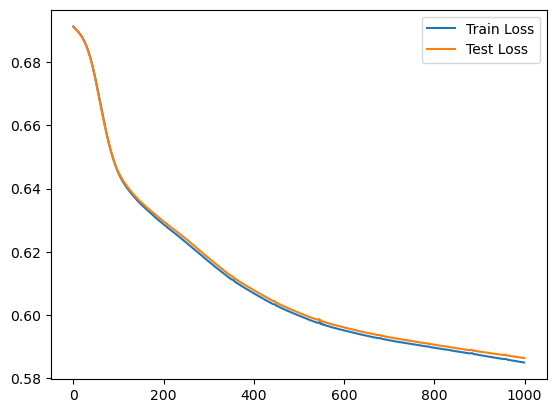

F1:0.7271328855524825
Accuracy:0.7056988636363636
Confusion Matrix:
[[55189 27685]
 [24112 69014]]


In [12]:
# Create the model
reload(mlp)
hidden_size = 30
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Learning Rate: 0.000010
Epoch 1/100, Train Loss: 0.6936456561088562, Test Loss: 0.6935644745826721
Epoch 2/100, Train Loss: 0.6936434507369995, Test Loss: 0.6935623288154602
Epoch 3/100, Train Loss: 0.6936412453651428, Test Loss: 0.6935603022575378
Epoch 4/100, Train Loss: 0.6936390995979309, Test Loss: 0.6935582160949707
Epoch 5/100, Train Loss: 0.6936368942260742, Test Loss: 0.6935561299324036
Epoch 6/100, Train Loss: 0.6936346888542175, Test Loss: 0.6935541033744812
Epoch 7/100, Train Loss: 0.6936325430870056, Test Loss: 0.6935520768165588
Epoch 8/100, Train Loss: 0.6936303377151489, Test Loss: 0.6935499906539917
Epoch 9/100, Train Loss: 0.6936280131340027, Test Loss: 0.6935479640960693
Epoch 10/100, Train Loss: 0.6936258673667908, Test Loss: 0.693545937538147
Epoch 11/100, Train Loss: 0.6936237812042236, Test Loss: 0.6935438513755798
Epoch 12/100, Train Loss: 0.6936215758323669, Test Loss: 0.6935417652130127
Epoch 13/100, Train Loss: 0.6936193108558655, Test Loss: 0.693539738655090

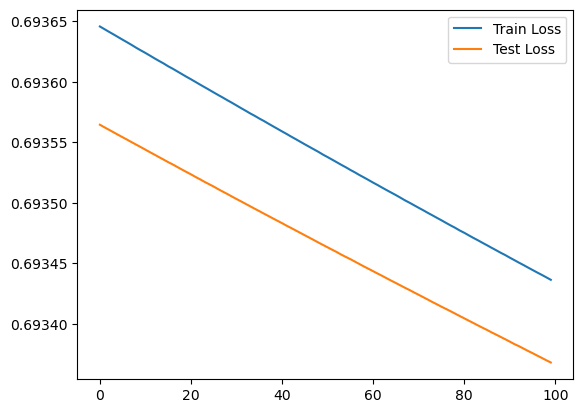

F1:0.218077450160744
Accuracy:0.4845397727272727
Confusion Matrix:
[[72628 10246]
 [80475 12651]]

Learning Rate: 0.000015
Epoch 1/100, Train Loss: 0.6932554841041565, Test Loss: 0.6932302713394165
Epoch 2/100, Train Loss: 0.6932510137557983, Test Loss: 0.6932260394096375
Epoch 3/100, Train Loss: 0.6932466626167297, Test Loss: 0.693221926689148
Epoch 4/100, Train Loss: 0.6932421922683716, Test Loss: 0.6932177543640137
Epoch 5/100, Train Loss: 0.6932377815246582, Test Loss: 0.6932135820388794
Epoch 6/100, Train Loss: 0.6932334303855896, Test Loss: 0.6932094693183899
Epoch 7/100, Train Loss: 0.6932289600372314, Test Loss: 0.6932052373886108
Epoch 8/100, Train Loss: 0.6932246088981628, Test Loss: 0.6932011842727661
Epoch 9/100, Train Loss: 0.6932200789451599, Test Loss: 0.6931970119476318
Epoch 10/100, Train Loss: 0.6932157278060913, Test Loss: 0.6931928396224976
Epoch 11/100, Train Loss: 0.6932114362716675, Test Loss: 0.6931887269020081
Epoch 12/100, Train Loss: 0.6932070851325989, Test 

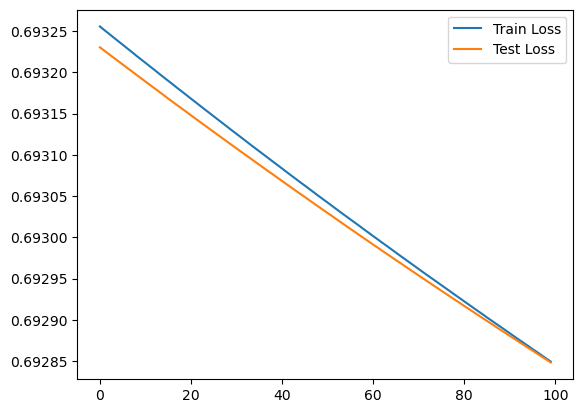

F1:0.6114703718913163
Accuracy:0.5108125
Confusion Matrix:
[[22153 60721]
 [25376 67750]]

Learning Rate: 0.000023
Epoch 1/100, Train Loss: 0.6937162280082703, Test Loss: 0.693662703037262
Epoch 2/100, Train Loss: 0.6937097907066345, Test Loss: 0.6936566829681396
Epoch 3/100, Train Loss: 0.6937033534049988, Test Loss: 0.6936506032943726
Epoch 4/100, Train Loss: 0.693696916103363, Test Loss: 0.693644642829895
Epoch 5/100, Train Loss: 0.6936905384063721, Test Loss: 0.6936385631561279
Epoch 6/100, Train Loss: 0.6936841011047363, Test Loss: 0.6936326026916504
Epoch 7/100, Train Loss: 0.6936777234077454, Test Loss: 0.6936265230178833
Epoch 8/100, Train Loss: 0.6936713457107544, Test Loss: 0.6936205625534058
Epoch 9/100, Train Loss: 0.6936649680137634, Test Loss: 0.6936145424842834
Epoch 10/100, Train Loss: 0.6936585307121277, Test Loss: 0.6936085820198059
Epoch 11/100, Train Loss: 0.6936521530151367, Test Loss: 0.6936026811599731
Epoch 12/100, Train Loss: 0.6936458945274353, Test Loss: 0.69

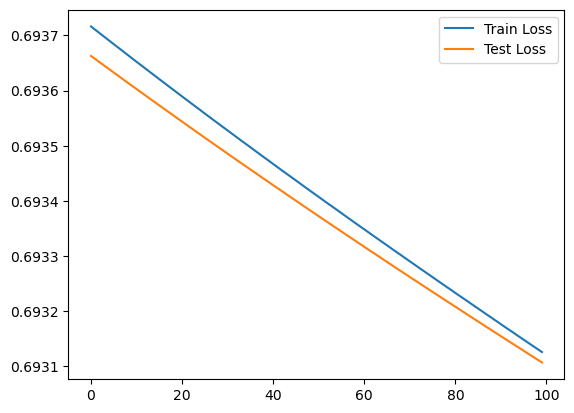

F1:0.5558486168189903
Accuracy:0.5062954545454545
Confusion Matrix:
[[34736 48138]
 [38754 54372]]

Learning Rate: 0.000034
Epoch 1/100, Train Loss: 0.6932464241981506, Test Loss: 0.6932467222213745
Epoch 2/100, Train Loss: 0.6932395100593567, Test Loss: 0.6932401657104492
Epoch 3/100, Train Loss: 0.6932326555252075, Test Loss: 0.6932337284088135
Epoch 4/100, Train Loss: 0.6932256817817688, Test Loss: 0.693227231502533
Epoch 5/100, Train Loss: 0.6932187676429749, Test Loss: 0.6932207942008972
Epoch 6/100, Train Loss: 0.6932119131088257, Test Loss: 0.6932143568992615
Epoch 7/100, Train Loss: 0.6932049989700317, Test Loss: 0.693207859992981
Epoch 8/100, Train Loss: 0.6931982636451721, Test Loss: 0.6932014226913452
Epoch 9/100, Train Loss: 0.6931913495063782, Test Loss: 0.6931949853897095
Epoch 10/100, Train Loss: 0.6931846141815186, Test Loss: 0.6931886672973633
Epoch 11/100, Train Loss: 0.6931777596473694, Test Loss: 0.6931822299957275
Epoch 12/100, Train Loss: 0.693170964717865, Test L

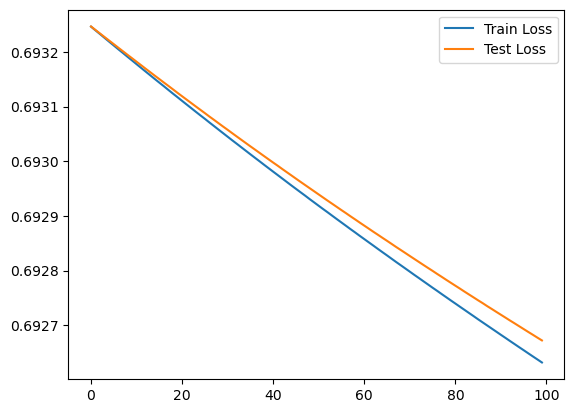

F1:0.6820733717741262
Accuracy:0.5244431818181818
Confusion Matrix:
[[ 2520 80354]
 [ 3344 89782]]

Learning Rate: 0.000051
Epoch 1/100, Train Loss: 0.6951615214347839, Test Loss: 0.6950564384460449
Epoch 2/100, Train Loss: 0.6951373219490051, Test Loss: 0.6950331330299377
Epoch 3/100, Train Loss: 0.6951131820678711, Test Loss: 0.6950097680091858
Epoch 4/100, Train Loss: 0.6950892210006714, Test Loss: 0.6949865221977234
Epoch 5/100, Train Loss: 0.6950652599334717, Test Loss: 0.6949633359909058
Epoch 6/100, Train Loss: 0.6950414180755615, Test Loss: 0.6949402689933777
Epoch 7/100, Train Loss: 0.6950175762176514, Test Loss: 0.6949172616004944
Epoch 8/100, Train Loss: 0.6949939131736755, Test Loss: 0.6948943734169006
Epoch 9/100, Train Loss: 0.6949701905250549, Test Loss: 0.6948714852333069
Epoch 10/100, Train Loss: 0.6949467062950134, Test Loss: 0.6948488354682922
Epoch 11/100, Train Loss: 0.6949233412742615, Test Loss: 0.6948262453079224
Epoch 12/100, Train Loss: 0.6948999762535095, Tes

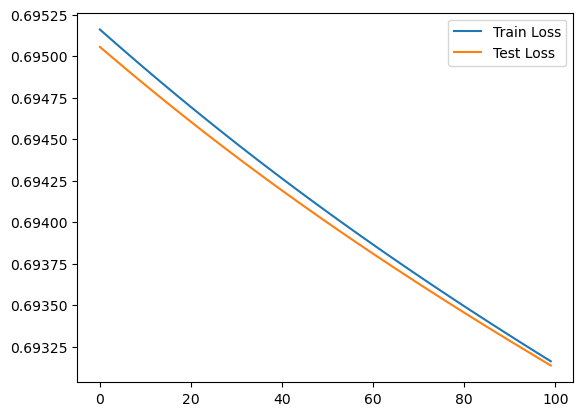

F1:0.531945426117501
Accuracy:0.5033409090909091
Confusion Matrix:
[[38916 43958]
 [43454 49672]]

Learning Rate: 0.000076
Epoch 1/100, Train Loss: 0.6944356560707092, Test Loss: 0.6943936347961426
Epoch 2/100, Train Loss: 0.6944159269332886, Test Loss: 0.6943747401237488
Epoch 3/100, Train Loss: 0.6943963766098022, Test Loss: 0.6943559050559998
Epoch 4/100, Train Loss: 0.6943768262863159, Test Loss: 0.6943371295928955
Epoch 5/100, Train Loss: 0.6943574547767639, Test Loss: 0.6943185925483704
Epoch 6/100, Train Loss: 0.6943382024765015, Test Loss: 0.6943000555038452
Epoch 7/100, Train Loss: 0.6943190693855286, Test Loss: 0.6942816376686096
Epoch 8/100, Train Loss: 0.6942999362945557, Test Loss: 0.6942632794380188
Epoch 9/100, Train Loss: 0.6942809820175171, Test Loss: 0.6942451596260071
Epoch 10/100, Train Loss: 0.6942622065544128, Test Loss: 0.6942269802093506
Epoch 11/100, Train Loss: 0.6942434310913086, Test Loss: 0.6942089796066284
Epoch 12/100, Train Loss: 0.6942248344421387, Test

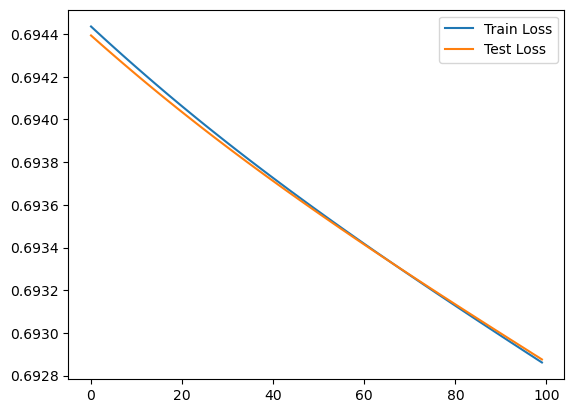

F1:0.6788654937614413
Accuracy:0.5235568181818182
Confusion Matrix:
[[ 3514 79360]
 [ 4494 88632]]

Learning Rate: 0.000114
Epoch 1/100, Train Loss: 0.691544771194458, Test Loss: 0.6916437149047852
Epoch 2/100, Train Loss: 0.6915286779403687, Test Loss: 0.6916282773017883
Epoch 3/100, Train Loss: 0.6915126442909241, Test Loss: 0.691612958908081
Epoch 4/100, Train Loss: 0.6914966106414795, Test Loss: 0.6915975213050842
Epoch 5/100, Train Loss: 0.6914805173873901, Test Loss: 0.6915821433067322
Epoch 6/100, Train Loss: 0.6914644837379456, Test Loss: 0.6915667057037354
Epoch 7/100, Train Loss: 0.6914485096931458, Test Loss: 0.6915513277053833
Epoch 8/100, Train Loss: 0.6914324760437012, Test Loss: 0.6915359497070312
Epoch 9/100, Train Loss: 0.6914164423942566, Test Loss: 0.691520631313324
Epoch 10/100, Train Loss: 0.6914004683494568, Test Loss: 0.6915052533149719
Epoch 11/100, Train Loss: 0.6913844347000122, Test Loss: 0.6914898157119751
Epoch 12/100, Train Loss: 0.6913684010505676, Test L

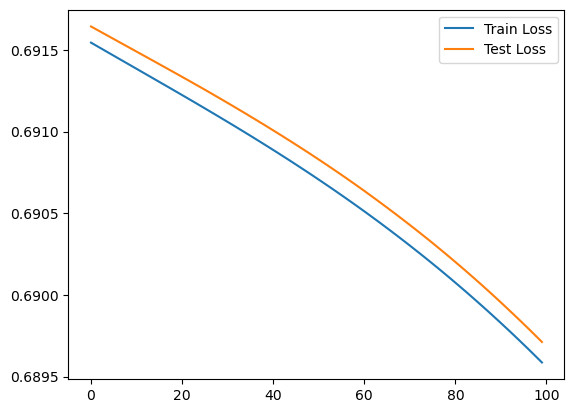

F1:0.6921666833989613
Accuracy:0.5296079545454545
Confusion Matrix:
[[  135 82739]
 [   50 93076]]

Learning Rate: 0.000171
Epoch 1/100, Train Loss: 0.6934669613838196, Test Loss: 0.6933459043502808
Epoch 2/100, Train Loss: 0.6934239864349365, Test Loss: 0.6933059692382812
Epoch 3/100, Train Loss: 0.6933812499046326, Test Loss: 0.6932665109634399
Epoch 4/100, Train Loss: 0.693338930606842, Test Loss: 0.6932274699211121
Epoch 5/100, Train Loss: 0.6932970881462097, Test Loss: 0.6931889057159424
Epoch 6/100, Train Loss: 0.6932555437088013, Test Loss: 0.6931506991386414
Epoch 7/100, Train Loss: 0.6932144165039062, Test Loss: 0.6931127905845642
Epoch 8/100, Train Loss: 0.6931735873222351, Test Loss: 0.6930752992630005
Epoch 9/100, Train Loss: 0.6931332945823669, Test Loss: 0.6930381655693054
Epoch 10/100, Train Loss: 0.6930931210517883, Test Loss: 0.6930013298988342
Epoch 11/100, Train Loss: 0.6930535435676575, Test Loss: 0.6929648518562317
Epoch 12/100, Train Loss: 0.6930142641067505, Test

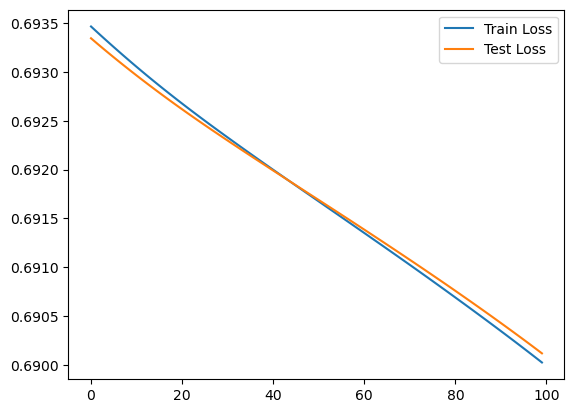

F1:0.6895147221674428
Accuracy:0.5348295454545454
Confusion Matrix:
[[ 3223 79651]
 [ 2219 90907]]

Learning Rate: 0.000256
Epoch 1/100, Train Loss: 0.6914451718330383, Test Loss: 0.6914838552474976
Epoch 2/100, Train Loss: 0.6914023756980896, Test Loss: 0.6914424300193787
Epoch 3/100, Train Loss: 0.6913591027259827, Test Loss: 0.6914005875587463
Epoch 4/100, Train Loss: 0.691315770149231, Test Loss: 0.6913586854934692
Epoch 5/100, Train Loss: 0.6912720799446106, Test Loss: 0.6913167834281921
Epoch 6/100, Train Loss: 0.6912283897399902, Test Loss: 0.6912746429443359
Epoch 7/100, Train Loss: 0.6911847591400146, Test Loss: 0.6912327408790588
Epoch 8/100, Train Loss: 0.6911409497261047, Test Loss: 0.6911906599998474
Epoch 9/100, Train Loss: 0.6910973787307739, Test Loss: 0.6911487579345703
Epoch 10/100, Train Loss: 0.6910537481307983, Test Loss: 0.6911070942878723
Epoch 11/100, Train Loss: 0.6910104155540466, Test Loss: 0.6910656690597534
Epoch 12/100, Train Loss: 0.6909673810005188, Test

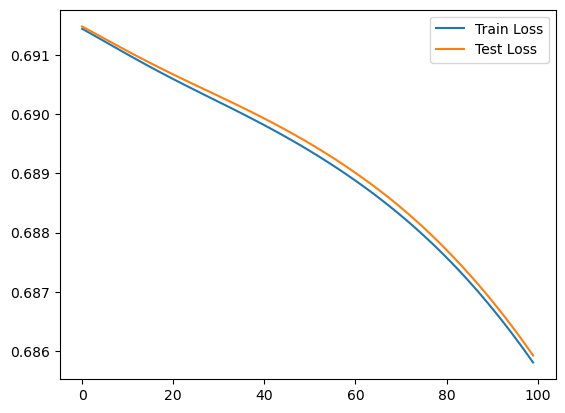

F1:0.6966143770136798
Accuracy:0.5430909090909091
Confusion Matrix:
[[ 3261 79613]
 [  803 92323]]

Learning Rate: 0.000384
Epoch 1/100, Train Loss: 0.6957050561904907, Test Loss: 0.6953917145729065
Epoch 2/100, Train Loss: 0.6955064535140991, Test Loss: 0.6952046155929565
Epoch 3/100, Train Loss: 0.6953105330467224, Test Loss: 0.6950203776359558
Epoch 4/100, Train Loss: 0.6951177716255188, Test Loss: 0.6948392987251282
Epoch 5/100, Train Loss: 0.6949278712272644, Test Loss: 0.6946611404418945
Epoch 6/100, Train Loss: 0.6947411894798279, Test Loss: 0.6944864392280579
Epoch 7/100, Train Loss: 0.6945578455924988, Test Loss: 0.6943151950836182
Epoch 8/100, Train Loss: 0.6943779587745667, Test Loss: 0.6941476464271545
Epoch 9/100, Train Loss: 0.6942018270492554, Test Loss: 0.6939840316772461
Epoch 10/100, Train Loss: 0.6940293312072754, Test Loss: 0.6938242316246033
Epoch 11/100, Train Loss: 0.6938607096672058, Test Loss: 0.693668782711029
Epoch 12/100, Train Loss: 0.6936962008476257, Test

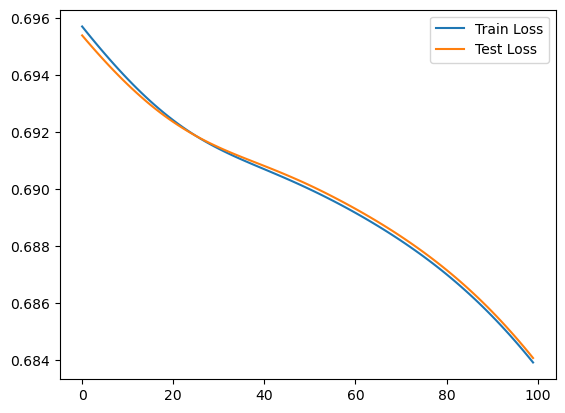

F1:0.6907268529006155
Accuracy:0.557846590909091
Confusion Matrix:
[[11281 71593]
 [ 6226 86900]]

Learning Rate: 0.000577
Epoch 1/100, Train Loss: 0.6920644044876099, Test Loss: 0.6920977830886841
Epoch 2/100, Train Loss: 0.6919749975204468, Test Loss: 0.6920140981674194
Epoch 3/100, Train Loss: 0.6918880343437195, Test Loss: 0.6919324994087219
Epoch 4/100, Train Loss: 0.6918032169342041, Test Loss: 0.6918526887893677
Epoch 5/100, Train Loss: 0.6917203664779663, Test Loss: 0.691774308681488
Epoch 6/100, Train Loss: 0.6916391253471375, Test Loss: 0.691697359085083
Epoch 7/100, Train Loss: 0.6915593147277832, Test Loss: 0.691621720790863
Epoch 8/100, Train Loss: 0.6914807558059692, Test Loss: 0.6915470361709595
Epoch 9/100, Train Loss: 0.6914035677909851, Test Loss: 0.6914734840393066
Epoch 10/100, Train Loss: 0.6913274526596069, Test Loss: 0.6914008855819702
Epoch 11/100, Train Loss: 0.6912521719932556, Test Loss: 0.691328763961792
Epoch 12/100, Train Loss: 0.6911775469779968, Test Los

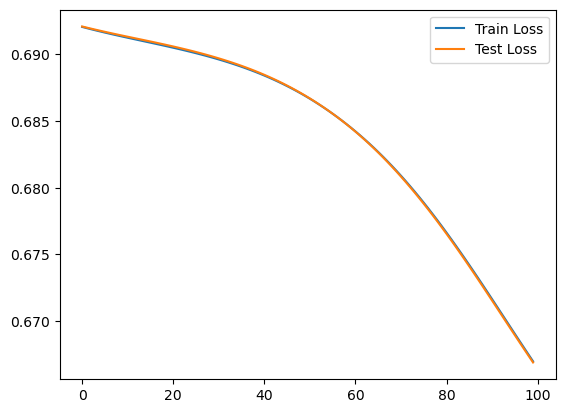

F1:0.669856097064683
Accuracy:0.6035965909090909
Confusion Matrix:
[[35455 47419]
 [22348 70778]]

Learning Rate: 0.000865
Epoch 1/100, Train Loss: 0.6926654577255249, Test Loss: 0.6925168037414551
Epoch 2/100, Train Loss: 0.6924628615379333, Test Loss: 0.6923375129699707
Epoch 3/100, Train Loss: 0.6922720074653625, Test Loss: 0.6921679377555847
Epoch 4/100, Train Loss: 0.6920917630195618, Test Loss: 0.6920068264007568
Epoch 5/100, Train Loss: 0.6919205188751221, Test Loss: 0.6918533444404602
Epoch 6/100, Train Loss: 0.6917569041252136, Test Loss: 0.691705584526062
Epoch 7/100, Train Loss: 0.6915998458862305, Test Loss: 0.691561758518219
Epoch 8/100, Train Loss: 0.6914471983909607, Test Loss: 0.6914207339286804
Epoch 9/100, Train Loss: 0.6912975311279297, Test Loss: 0.6912806034088135
Epoch 10/100, Train Loss: 0.6911494135856628, Test Loss: 0.6911402940750122
Epoch 11/100, Train Loss: 0.691001832485199, Test Loss: 0.6909990310668945
Epoch 12/100, Train Loss: 0.6908537149429321, Test Lo

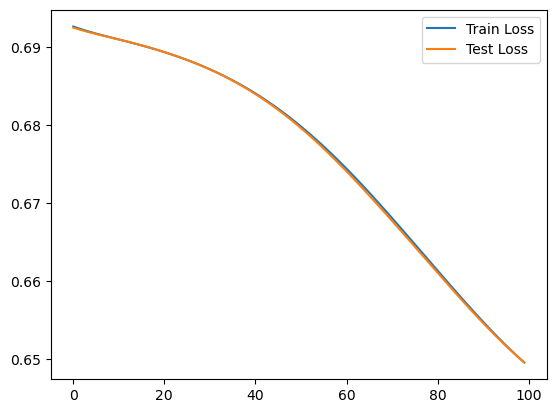

F1:0.6824350598848965
Accuracy:0.6287954545454545
Confusion Matrix:
[[40470 42404]
 [22928 70198]]

Learning Rate: 0.001297
Epoch 1/100, Train Loss: 0.6946094036102295, Test Loss: 0.6941816806793213
Epoch 2/100, Train Loss: 0.6942091584205627, Test Loss: 0.6938462853431702
Epoch 3/100, Train Loss: 0.6938429474830627, Test Loss: 0.6935433745384216
Epoch 4/100, Train Loss: 0.693510115146637, Test Loss: 0.6932722330093384
Epoch 5/100, Train Loss: 0.6932097673416138, Test Loss: 0.6930320262908936
Epoch 6/100, Train Loss: 0.6929409503936768, Test Loss: 0.6928205490112305
Epoch 7/100, Train Loss: 0.6927017569541931, Test Loss: 0.6926356554031372
Epoch 8/100, Train Loss: 0.6924906373023987, Test Loss: 0.6924758553504944
Epoch 9/100, Train Loss: 0.692305326461792, Test Loss: 0.6923378705978394
Epoch 10/100, Train Loss: 0.6921429634094238, Test Loss: 0.6922178864479065
Epoch 11/100, Train Loss: 0.692000150680542, Test Loss: 0.6921114921569824
Epoch 12/100, Train Loss: 0.691872775554657, Test Lo

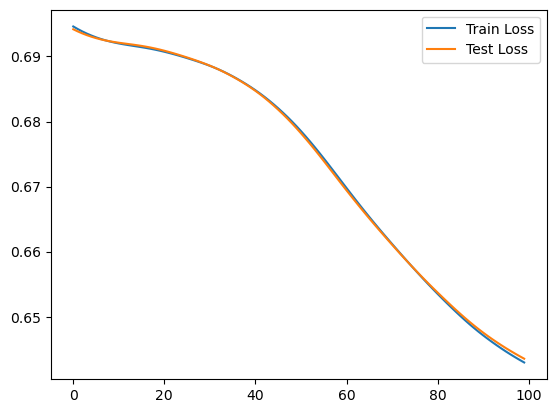

F1:0.6798073747664888
Accuracy:0.6309034090909091
Confusion Matrix:
[[42079 40795]
 [24166 68960]]

Learning Rate: 0.001946
Epoch 1/100, Train Loss: 0.6921833157539368, Test Loss: 0.6919282078742981
Epoch 2/100, Train Loss: 0.6918379068374634, Test Loss: 0.6916537284851074
Epoch 3/100, Train Loss: 0.6915333867073059, Test Loss: 0.6914071440696716
Epoch 4/100, Train Loss: 0.6912612915039062, Test Loss: 0.6911788582801819
Epoch 5/100, Train Loss: 0.6910120248794556, Test Loss: 0.6909574866294861
Epoch 6/100, Train Loss: 0.690772294998169, Test Loss: 0.6907296180725098
Epoch 7/100, Train Loss: 0.6905309557914734, Test Loss: 0.6904851794242859
Epoch 8/100, Train Loss: 0.6902775764465332, Test Loss: 0.6902159452438354
Epoch 9/100, Train Loss: 0.690004825592041, Test Loss: 0.689917802810669
Epoch 10/100, Train Loss: 0.6897085309028625, Test Loss: 0.6895915269851685
Epoch 11/100, Train Loss: 0.6893876791000366, Test Loss: 0.6892378330230713
Epoch 12/100, Train Loss: 0.6890417337417603, Test L

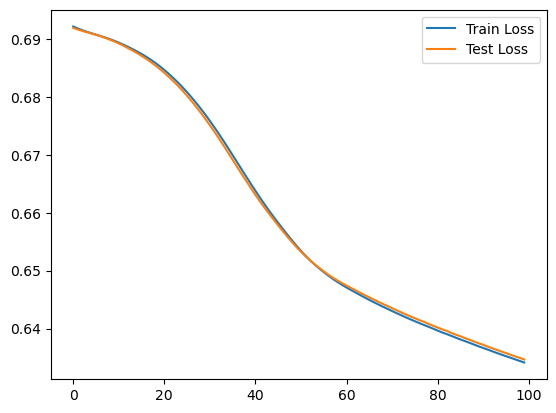

F1:0.6887230159480037
Accuracy:0.6443465909090909
Confusion Matrix:
[[44157 38717]
 [23878 69248]]

Learning Rate: 0.002919
Epoch 1/100, Train Loss: 0.6927112340927124, Test Loss: 0.6923819780349731
Epoch 2/100, Train Loss: 0.6923254132270813, Test Loss: 0.6920779347419739
Epoch 3/100, Train Loss: 0.6920032501220703, Test Loss: 0.6917991042137146
Epoch 4/100, Train Loss: 0.6917067170143127, Test Loss: 0.6915259957313538
Epoch 5/100, Train Loss: 0.6914173364639282, Test Loss: 0.6912510991096497
Epoch 6/100, Train Loss: 0.6911279559135437, Test Loss: 0.6909711956977844
Epoch 7/100, Train Loss: 0.6908330321311951, Test Loss: 0.6906798481941223
Epoch 8/100, Train Loss: 0.6905280947685242, Test Loss: 0.6903743743896484
Epoch 9/100, Train Loss: 0.6902097463607788, Test Loss: 0.6900531053543091
Epoch 10/100, Train Loss: 0.68987637758255, Test Loss: 0.6897156238555908
Epoch 11/100, Train Loss: 0.6895257830619812, Test Loss: 0.6893541812896729
Epoch 12/100, Train Loss: 0.689153254032135, Test L

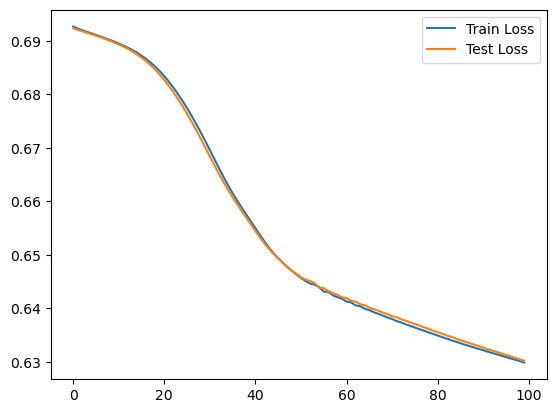

F1:0.6930780971001625
Accuracy:0.6503636363636364
Confusion Matrix:
[[44985 37889]
 [23647 69479]]

Learning Rate: 0.004379
Epoch 1/100, Train Loss: 0.6918294429779053, Test Loss: 0.6912317872047424
Epoch 2/100, Train Loss: 0.6911349296569824, Test Loss: 0.6907613277435303
Epoch 3/100, Train Loss: 0.6906241774559021, Test Loss: 0.6903328895568848
Epoch 4/100, Train Loss: 0.6901700496673584, Test Loss: 0.6898396611213684
Epoch 5/100, Train Loss: 0.6896633505821228, Test Loss: 0.6892379522323608
Epoch 6/100, Train Loss: 0.6890568733215332, Test Loss: 0.6885385513305664
Epoch 7/100, Train Loss: 0.688362717628479, Test Loss: 0.6877747178077698
Epoch 8/100, Train Loss: 0.687605619430542, Test Loss: 0.6869434118270874
Epoch 9/100, Train Loss: 0.686777651309967, Test Loss: 0.6859967708587646
Epoch 10/100, Train Loss: 0.6858275532722473, Test Loss: 0.6848883032798767
Epoch 11/100, Train Loss: 0.6847044825553894, Test Loss: 0.6836150288581848
Epoch 12/100, Train Loss: 0.6834051609039307, Test L

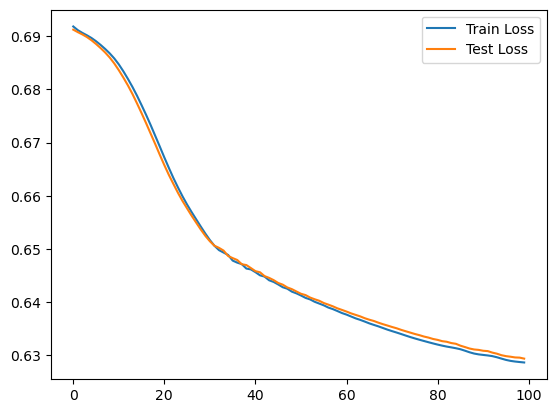

F1:0.6885701158813621
Accuracy:0.653375
Confusion Matrix:
[[47552 35322]
 [25684 67442]]

Learning Rate: 0.006568
Epoch 1/100, Train Loss: 0.693351149559021, Test Loss: 0.6923389434814453
Epoch 2/100, Train Loss: 0.6921889781951904, Test Loss: 0.6917809844017029
Epoch 3/100, Train Loss: 0.6915454268455505, Test Loss: 0.691402018070221
Epoch 4/100, Train Loss: 0.691113293170929, Test Loss: 0.6909356713294983
Epoch 5/100, Train Loss: 0.6906295418739319, Test Loss: 0.690269410610199
Epoch 6/100, Train Loss: 0.6899788975715637, Test Loss: 0.6894323229789734
Epoch 7/100, Train Loss: 0.6891810297966003, Test Loss: 0.6885045170783997
Epoch 8/100, Train Loss: 0.6882985234260559, Test Loss: 0.6874992847442627
Epoch 9/100, Train Loss: 0.6873335838317871, Test Loss: 0.6863461136817932
Epoch 10/100, Train Loss: 0.6861956119537354, Test Loss: 0.6849323511123657
Epoch 11/100, Train Loss: 0.6847692131996155, Test Loss: 0.6832926869392395
Epoch 12/100, Train Loss: 0.6830783486366272, Test Loss: 0.6816

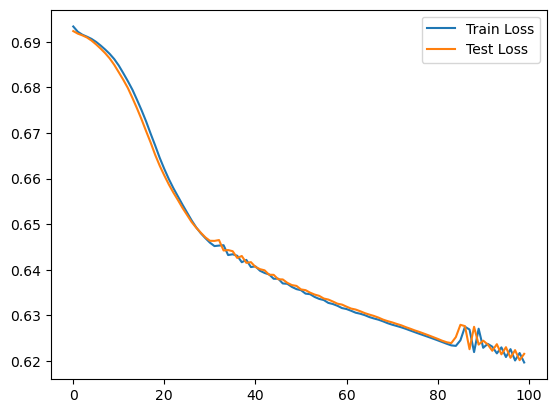

F1:0.6813501328828587
Accuracy:0.6634659090909091
Confusion Matrix:
[[53446 29428]
 [29802 63324]]

Learning Rate: 0.009853
Epoch 1/100, Train Loss: 0.6919754147529602, Test Loss: 0.6910761594772339
Epoch 2/100, Train Loss: 0.6908632516860962, Test Loss: 0.690626859664917
Epoch 3/100, Train Loss: 0.6903315186500549, Test Loss: 0.6895974278450012
Epoch 4/100, Train Loss: 0.6892932653427124, Test Loss: 0.6883143782615662
Epoch 5/100, Train Loss: 0.6880304217338562, Test Loss: 0.6870195269584656
Epoch 6/100, Train Loss: 0.6867502927780151, Test Loss: 0.6852641105651855
Epoch 7/100, Train Loss: 0.6849902272224426, Test Loss: 0.6828582882881165
Epoch 8/100, Train Loss: 0.6825283765792847, Test Loss: 0.6804288625717163
Epoch 9/100, Train Loss: 0.6800191402435303, Test Loss: 0.6776230931282043
Epoch 10/100, Train Loss: 0.6771844029426575, Test Loss: 0.6745230555534363
Epoch 11/100, Train Loss: 0.6741206049919128, Test Loss: 0.6713607311248779
Epoch 12/100, Train Loss: 0.6708860397338867, Test

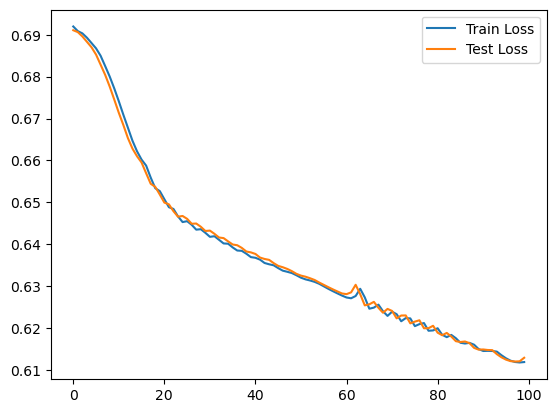

F1:0.7147142142976171
Accuracy:0.6692727272727272
Confusion Matrix:
[[44879 37995]
 [20213 72913]]

Learning Rate: 0.014779
Epoch 1/100, Train Loss: 0.6979339122772217, Test Loss: 0.6932514309883118
Epoch 2/100, Train Loss: 0.6932485699653625, Test Loss: 0.6920093297958374
Epoch 3/100, Train Loss: 0.691807210445404, Test Loss: 0.6919286847114563
Epoch 4/100, Train Loss: 0.6915385723114014, Test Loss: 0.6905826926231384
Epoch 5/100, Train Loss: 0.6902135610580444, Test Loss: 0.6891185641288757
Epoch 6/100, Train Loss: 0.6888270378112793, Test Loss: 0.6874960064888
Epoch 7/100, Train Loss: 0.6872082948684692, Test Loss: 0.6849738955497742
Epoch 8/100, Train Loss: 0.6845493912696838, Test Loss: 0.6829052567481995
Epoch 9/100, Train Loss: 0.6823139786720276, Test Loss: 0.6797622442245483
Epoch 10/100, Train Loss: 0.6791770458221436, Test Loss: 0.6770461201667786
Epoch 11/100, Train Loss: 0.6765405535697937, Test Loss: 0.6733875274658203
Epoch 12/100, Train Loss: 0.672802209854126, Test Los

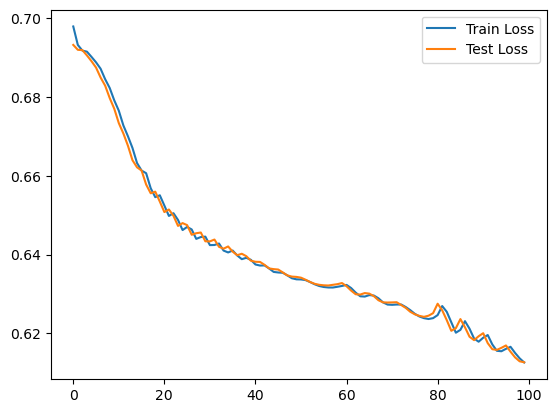

F1:0.696123736574455
Accuracy:0.6727045454545455
Confusion Matrix:
[[52416 30458]
 [27146 65980]]

Learning Rate: 0.022168
Epoch 1/100, Train Loss: 0.6918266415596008, Test Loss: 0.6900677680969238
Epoch 2/100, Train Loss: 0.6897983551025391, Test Loss: 0.6877557635307312
Epoch 3/100, Train Loss: 0.6875987648963928, Test Loss: 0.6846818327903748
Epoch 4/100, Train Loss: 0.6844308972358704, Test Loss: 0.6800139546394348
Epoch 5/100, Train Loss: 0.679816722869873, Test Loss: 0.6739357113838196
Epoch 6/100, Train Loss: 0.6735967993736267, Test Loss: 0.6678745746612549
Epoch 7/100, Train Loss: 0.667719304561615, Test Loss: 0.6849828958511353
Epoch 8/100, Train Loss: 0.6840289235115051, Test Loss: 0.6665427088737488
Epoch 9/100, Train Loss: 0.6665935516357422, Test Loss: 0.6680748462677002
Epoch 10/100, Train Loss: 0.6681104898452759, Test Loss: 0.6620756983757019
Epoch 11/100, Train Loss: 0.6614695191383362, Test Loss: 0.6663259267807007
Epoch 12/100, Train Loss: 0.6655880212783813, Test L

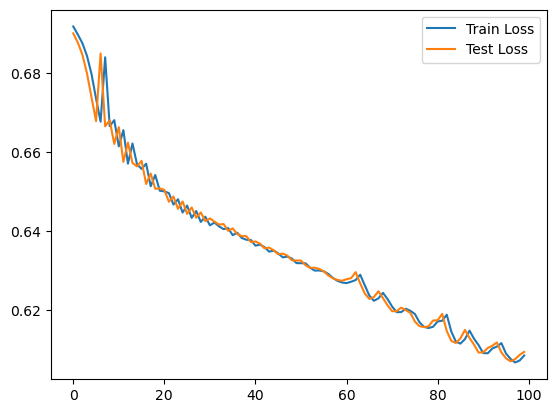

F1:0.6803624969763792
Accuracy:0.677153409090909
Confusion Matrix:
[[58706 24168]
 [32653 60473]]

Learning Rate: 0.033253
Epoch 1/100, Train Loss: 0.6951025128364563, Test Loss: 0.6951190233230591
Epoch 2/100, Train Loss: 0.6947228312492371, Test Loss: 0.6913578510284424
Epoch 3/100, Train Loss: 0.6912091374397278, Test Loss: 0.6913677453994751
Epoch 4/100, Train Loss: 0.6912960410118103, Test Loss: 0.6908062696456909
Epoch 5/100, Train Loss: 0.6907312273979187, Test Loss: 0.6898454427719116
Epoch 6/100, Train Loss: 0.6897245049476624, Test Loss: 0.6887613534927368
Epoch 7/100, Train Loss: 0.6885702610015869, Test Loss: 0.68743497133255
Epoch 8/100, Train Loss: 0.6871861815452576, Test Loss: 0.6854667663574219
Epoch 9/100, Train Loss: 0.6852275729179382, Test Loss: 0.683567464351654
Epoch 10/100, Train Loss: 0.6833924651145935, Test Loss: 0.6809383034706116
Epoch 11/100, Train Loss: 0.6807193160057068, Test Loss: 0.6777616739273071
Epoch 12/100, Train Loss: 0.6773549318313599, Test Lo

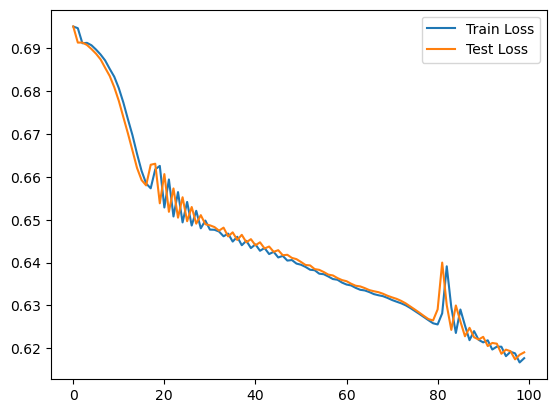

F1:0.71205102966437
Accuracy:0.6609204545454546
Confusion Matrix:
[[42535 40339]
 [19339 73787]]

Learning Rate: 0.049879
Epoch 1/100, Train Loss: 0.6943857073783875, Test Loss: 0.702256977558136
Epoch 2/100, Train Loss: 0.7014581561088562, Test Loss: 0.6916996836662292
Epoch 3/100, Train Loss: 0.6915790438652039, Test Loss: 0.692575216293335
Epoch 4/100, Train Loss: 0.6925119161605835, Test Loss: 0.6924800872802734
Epoch 5/100, Train Loss: 0.6924329400062561, Test Loss: 0.6922751069068909
Epoch 6/100, Train Loss: 0.6922205686569214, Test Loss: 0.6919569969177246
Epoch 7/100, Train Loss: 0.6918784976005554, Test Loss: 0.6914931535720825
Epoch 8/100, Train Loss: 0.6913694739341736, Test Loss: 0.6908568143844604
Epoch 9/100, Train Loss: 0.6906589865684509, Test Loss: 0.6900269389152527
Epoch 10/100, Train Loss: 0.6897218823432922, Test Loss: 0.68874192237854
Epoch 11/100, Train Loss: 0.6883242726325989, Test Loss: 0.687040388584137
Epoch 12/100, Train Loss: 0.686510443687439, Test Loss: 

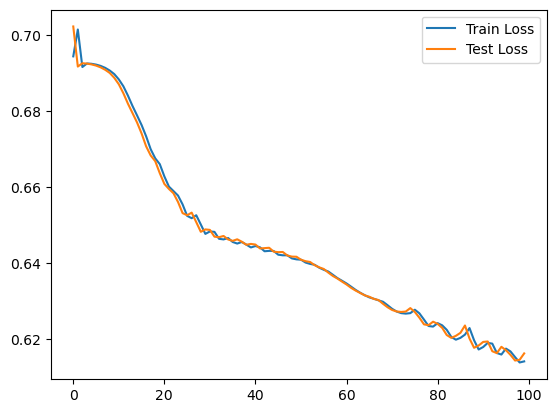

F1:0.7118317813626726
Accuracy:0.6648636363636363
Confusion Matrix:
[[44165 38709]
 [20275 72851]]

Learning Rate: 0.074818
Epoch 1/100, Train Loss: 0.6926705837249756, Test Loss: 0.7666776180267334
Epoch 2/100, Train Loss: 0.7652188539505005, Test Loss: 0.6905998587608337
Epoch 3/100, Train Loss: 0.6904430389404297, Test Loss: 0.6930049061775208
Epoch 4/100, Train Loss: 0.6929437518119812, Test Loss: 0.6926100254058838
Epoch 5/100, Train Loss: 0.6925689578056335, Test Loss: 0.6921311616897583
Epoch 6/100, Train Loss: 0.6919729113578796, Test Loss: 0.6915469169616699
Epoch 7/100, Train Loss: 0.6913784146308899, Test Loss: 0.6910655498504639
Epoch 8/100, Train Loss: 0.6909106969833374, Test Loss: 0.6906580924987793
Epoch 9/100, Train Loss: 0.6903335452079773, Test Loss: 0.6893646121025085
Epoch 10/100, Train Loss: 0.6890999674797058, Test Loss: 0.6879335045814514
Epoch 11/100, Train Loss: 0.687683641910553, Test Loss: 0.6862996220588684
Epoch 12/100, Train Loss: 0.6858534216880798, Test

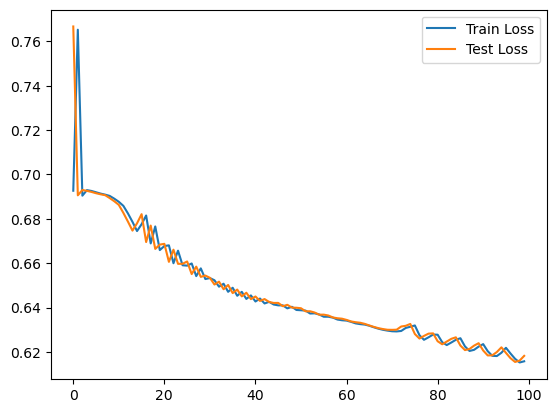

F1:0.7102863088579398
Accuracy:0.6630284090909091
Confusion Matrix:
[[43992 38882]
 [20425 72701]]

Learning Rate: 0.112227
Epoch 1/100, Train Loss: 0.6933332681655884, Test Loss: 0.7764503359794617
Epoch 2/100, Train Loss: 0.7747879028320312, Test Loss: 0.7349068522453308
Epoch 3/100, Train Loss: 0.7353741526603699, Test Loss: 0.718009889125824
Epoch 4/100, Train Loss: 0.7169249653816223, Test Loss: 0.6957714557647705
Epoch 5/100, Train Loss: 0.6952517628669739, Test Loss: 0.6918387413024902
Epoch 6/100, Train Loss: 0.6916468143463135, Test Loss: 0.6919776201248169
Epoch 7/100, Train Loss: 0.6918683648109436, Test Loss: 0.6913601160049438
Epoch 8/100, Train Loss: 0.6911884546279907, Test Loss: 0.6915799975395203
Epoch 9/100, Train Loss: 0.6913084983825684, Test Loss: 0.6917527914047241
Epoch 10/100, Train Loss: 0.6914615035057068, Test Loss: 0.6917756795883179
Epoch 11/100, Train Loss: 0.691483736038208, Test Loss: 0.6917344331741333
Epoch 12/100, Train Loss: 0.6914569139480591, Test 

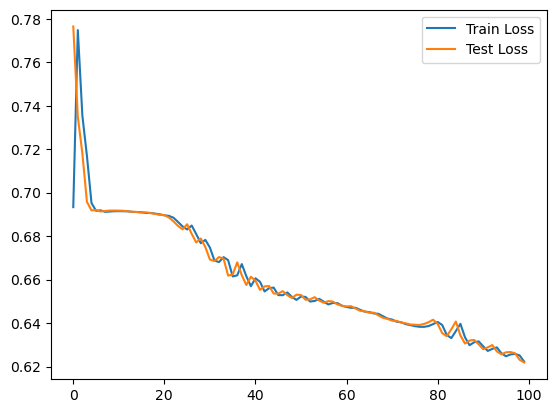

F1:0.6836442121523112
Accuracy:0.6602159090909091
Confusion Matrix:
[[51582 31292]
 [28510 64616]]

Learning Rate: 0.168341
Epoch 1/100, Train Loss: 0.6918542981147766, Test Loss: 0.7845643162727356
Epoch 2/100, Train Loss: 0.7828239798545837, Test Loss: 0.8333471417427063
Epoch 3/100, Train Loss: 0.8349999785423279, Test Loss: 0.7844329476356506
Epoch 4/100, Train Loss: 0.7826917767524719, Test Loss: 0.7847612500190735
Epoch 5/100, Train Loss: 0.7830215692520142, Test Loss: 0.7847802639007568
Epoch 6/100, Train Loss: 0.7830404043197632, Test Loss: 0.7847816944122314
Epoch 7/100, Train Loss: 0.7830416560173035, Test Loss: 0.784781813621521
Epoch 8/100, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 9/100, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 10/100, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 11/100, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 12/100, Train Loss: 0.783041775226593, Test Loss: 0.

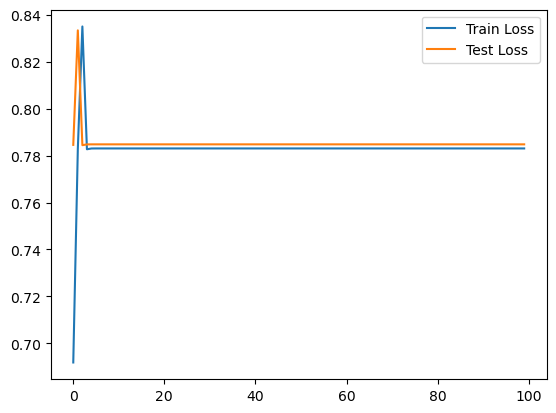

F1:0.6920624540178205
Accuracy:0.529125
Confusion Matrix:
[[    0 82874]
 [    0 93126]]



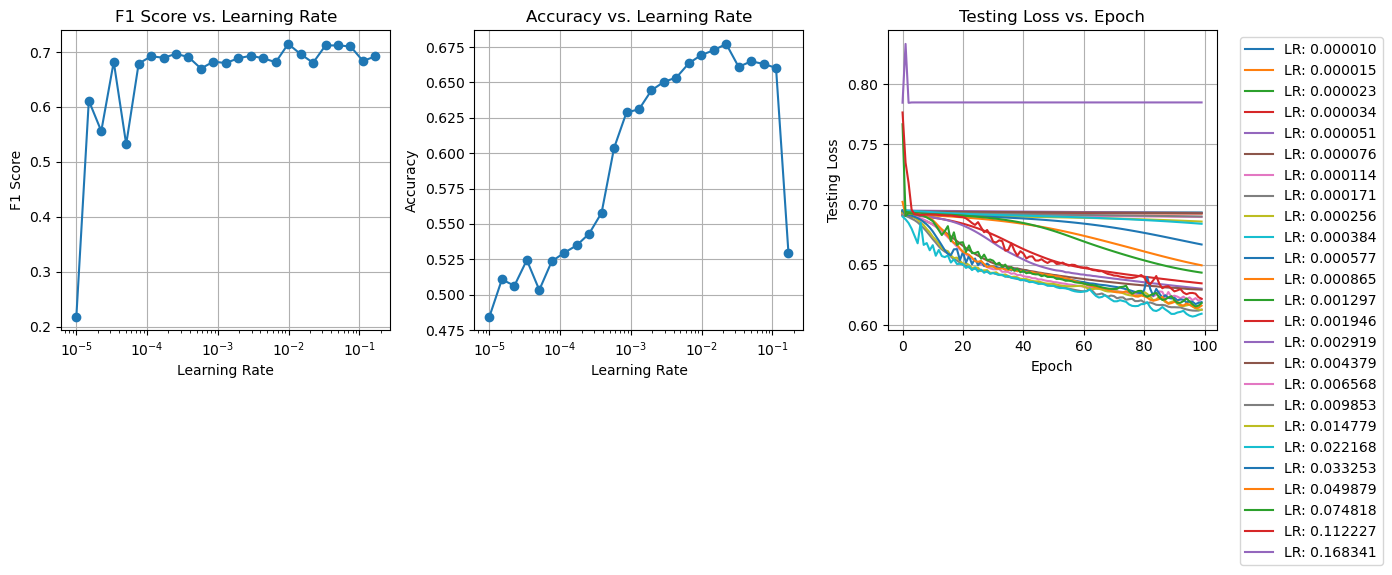

In [22]:
import matplotlib.pyplot as plt

lr_values = []
f1_scores = []
accuracies = []
test_losses_list = []

lr = 0.00001
while lr < 0.2:
    print(f"Learning Rate: {lr:.6f}")
    lr_values.append(lr)
    
    hidden_size = 30
    model = mlp.MLP_mach1(28, hidden_size)
    
    # Set the criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    n_epochs = 100
    
    # Train the model using our function
    train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
    
    # Make predictions on the validation set
    f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
    
    # Store the results
    f1_scores.append(f1)
    accuracies.append(acc)
    test_losses_list.append(test_losses)
    
    # Print the results
    print("F1:" + str(f1))
    print("Accuracy:" + str(acc))
    print("Confusion Matrix:")
    print(cm)
    print()  # Add a blank line for separation
    
    lr += lr / 2

# Plot the results
plt.figure(figsize=(14, 5))

# Plot F1 scores
plt.subplot(1, 3, 1)
plt.plot(lr_values, f1_scores, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Learning Rate')
plt.grid(True)

# Plot accuracies
plt.subplot(1, 3, 2)
plt.plot(lr_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.grid(True)

# Plot testing losses
plt.subplot(1, 3, 3)
for i, test_losses in enumerate(test_losses_list):
    plt.plot(range(len(test_losses)), test_losses, label=f'LR: {lr_values[i]:.6f}')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.8)  # Adjust the right margin to make space for the legend
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Which learning rate is the best?
best_lr = lr_values[np.argmax(f1_scores)]
print(f"The best learning rate is: {best_lr:.6f}")

The best learning rate is: 0.009853


Epoch 1/100, Train Loss: 0.6917847394943237, Test Loss: 0.690656304359436
Epoch 2/100, Train Loss: 0.6907647252082825, Test Loss: 0.6890964508056641
Epoch 3/100, Train Loss: 0.6894295811653137, Test Loss: 0.6874492168426514
Epoch 4/100, Train Loss: 0.6881676316261292, Test Loss: 0.685097336769104
Epoch 5/100, Train Loss: 0.6862054467201233, Test Loss: 0.682166337966919
Epoch 6/100, Train Loss: 0.6837232708930969, Test Loss: 0.6786639094352722
Epoch 7/100, Train Loss: 0.681274950504303, Test Loss: 0.674452543258667
Epoch 8/100, Train Loss: 0.6781654953956604, Test Loss: 0.6697661280632019
Epoch 9/100, Train Loss: 0.6748629808425903, Test Loss: 0.6648595929145813
Epoch 10/100, Train Loss: 0.6715644001960754, Test Loss: 0.6611517667770386
Epoch 11/100, Train Loss: 0.6696828603744507, Test Loss: 0.6611748337745667
Epoch 12/100, Train Loss: 0.6697683930397034, Test Loss: 0.6561025381088257
Epoch 13/100, Train Loss: 0.6661772727966309, Test Loss: 0.6549273729324341
Epoch 14/100, Train Loss: 

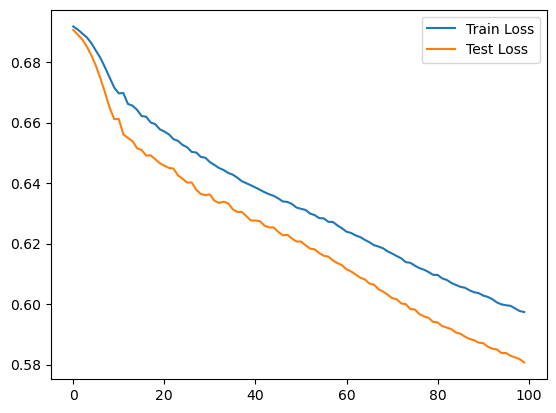

F1:0.7100413529848372
Accuracy:0.68925
Confusion Matrix:
[[54344 28530]
 [26162 66964]]


In [8]:
# Now lets see how our mach2 model does
# Set the size for four hidden layers and the dropout rate
model2 = mlp.MLP_mach2(28, 300, 220, 140, 80, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
# Lower learning rate with the adam optimizeer made the models accuracy better by over 10%
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
# Only trained for 100 epochs because it will be too slow otherwise. We can see that the training and testing losses are still decreasing
# so, we can use the same hyperparameters and train for more epochs on the GPU.
n_epochs = 100
# Train the model using our function
train_losses, test_losses = mlp.train_model(model2, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model2, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Once the models I was testing got as big as the one above I moved to training using slurm jobs on City's Hyperion. This also allowed me to use a larger amount of training data.